In [1]:
# iPython Circular Mannings Calculator (Beware: No Error Checking!)
########### INPUT VALUES ################
manningsn = 0.013 # supply n value look up in a table
depth = 5.0       # depth in feet
diameter = 5.0    # culvert/outlet diameter in feet
slope = 0.003     # culvert/outlet slope (feet/feet)
########### MATH PACKAGE ################
import math
import sys
########### CALCULATIONS ################
angle = math.acos(1.0 - 2 * depth / diameter) 
area = (diameter**2)*(angle-math.sin(angle)*math.cos(angle))/4.0
perimeter = angle*diameter
radius = area/perimeter
discharge = (1.49/manningsn)*area*(radius**(2/3))*math.sqrt(slope)
velocity = discharge/area
########### RESULTS ###############
print("Mannings n : %10.3f --  " %(manningsn))
print("    Depth  : %10.3f ft. " %(depth))
print(" Diameter  : %10.3f ft." %(diameter))
print("    Slope  : %10.3f ft./ft." %(slope))
print("    Angle  : %10.3f radians" %(angle))
print("      Area : %10.3f sq.ft." %(area))
print(" Perimeter : %10.3f ft." %(perimeter))
print(" Discharge : %10.3f cu.ft./sec" %(discharge))
print("  Velocity : %10.3f ft/sec" %(velocity))

Mannings n :      0.013 --  
    Depth  :      5.000 ft. 
 Diameter  :      5.000 ft.
    Slope  :      0.003 ft./ft.
    Angle  :      3.142 radians
      Area :     19.635 sq.ft.
 Perimeter :     15.708 ft.
 Discharge :    143.034 cu.ft./sec
  Velocity :      7.285 ft/sec


In [2]:
# iPython Orifice Calculator (Beware: No Error Checking!)
########### INPUT VALUES ################
coefficient = 0.574 # orifice coefficient (table lookup)
depth = 7.0       # depth above top of orifice in feet
diameter = 5.0    # orifice diameter in feet
slope = 0.003     # culvert/outlet slope (feet/feet)
########### MATH PACKAGE ################
import math
import sys
########### CALCULATIONS ################
if depth >= 0:
    centerline = depth + diameter - 0.5*diameter
    area = 0.25*math.pi*diameter**2
    discharge = coefficient*area*math.sqrt(2.0*32.2*centerline)
    velocity = discharge/area
else:
    print("not orifice flow")
    

########### RESULTS ###############
print("           Orifice Coef : %10.3f --  " %(coefficient))
print("                 Depth  : %10.3f ft. " %(depth))
print("              Diameter  : %10.3f ft." %(diameter))
print("Depth above centerline  : %10.3f ft." %(centerline))
print("                   Area : %10.3f sq.ft." %(area))
print("              Discharge : %10.3f cu.ft./sec" %(discharge))
print("               Velocity : %10.3f ft/sec" %(velocity))

           Orifice Coef :      0.574 --  
                 Depth  :      7.000 ft. 
              Diameter  :      5.000 ft.
Depth above centerline  :      9.500 ft.
                   Area :     19.635 sq.ft.
              Discharge :    278.770 cu.ft./sec
               Velocity :     14.198 ft/sec


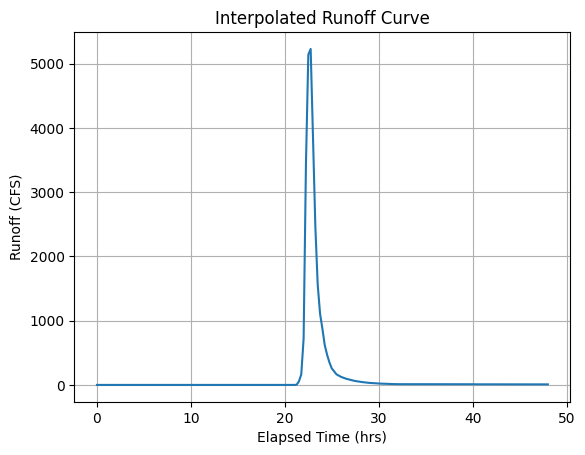

In [3]:
# Process runoff files
# refactor from original R script by Sensei + OpenAI assistant
# force memory purge
%reset -f 

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from io import StringIO

# Load file while skipping rows that start with '#'
#fileinput = "./AshCreekData/ashcreek_1973_0603/unit_sta08057320_1973_0603.txt"
fileinput = "./AshCreekData/ashcreek_1975_0527/unit_sta08057320_1975_0527.txt"
#fileinput = "./AshCreekData/ashcreek_1978_0520/unit_sta08057320_1978_0520.txt"

# Custom function to skip comment lines
from io import StringIO
def skip_hash_lines(filepath):
    with open(filepath, 'r') as f:
        lines = [line for line in f if not line.lstrip().startswith('#')]
    return pd.read_csv(StringIO("".join(lines)), sep=r"\s+")

# Use the custom reader
df = skip_hash_lines(fileinput)

# Extract necessary columns
time_col = df["HOURS_PASSED"]
runoff_col = df["RUNOFF"]

# Create uniform time vector (0.25 hr interval)
elapsed_time = np.arange(0, time_col.iloc[-1] + 0.25, 0.25)

# Linear interpolation
interpolator = interp1d(
    time_col,
    runoff_col,
    kind='linear',
    bounds_error=False,
    fill_value=(0, runoff_col.iloc[-1])
)
interpolated_runoff = interpolator(elapsed_time)

# Plot result
plt.plot(elapsed_time, interpolated_runoff)
plt.xlabel("Elapsed Time (hrs)")
plt.ylabel("Runoff (CFS)")
plt.title("Interpolated Runoff Curve")
plt.grid(True)
plt.show()

# Create output filename by replacing 'unit' with 'u15m'
outfile = fileinput.replace("unit", "u15m")

# Write output to CSV file
with open(outfile, "w") as f:
    for t, r in zip(elapsed_time, interpolated_runoff):
        f.write(f"{t:.2f},{r:.6f}\n")


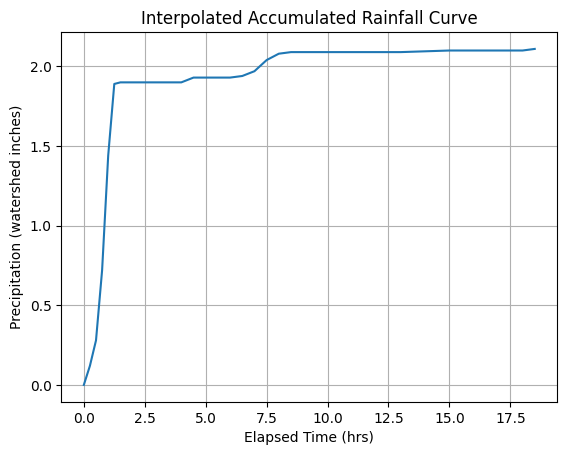

In [4]:
# Process rainfall files
# refactor from original R script by Sensei + OpenAI assistant
# force memory purge 
%reset -f 

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from io import StringIO

# Load file while skipping rows that start with '#'
#fileinput = "./AshCreekData/ashcreek_1973_0603/rain_sta08057320_1973_0603.txt"
fileinput = "./AshCreekData/ashcreek_1975_0527/rain_sta08057320_1975_0527.txt"
#fileinput = "./AshCreekData/ashcreek_1978_0520/rain_sta08057320_1978_0520.txt"

# Custom function to skip comment lines
from io import StringIO
def skip_hash_lines(filepath):
    with open(filepath, 'r') as f:
        lines = [line for line in f if not line.lstrip().startswith('#')]
    return pd.read_csv(StringIO("".join(lines)), sep=r"\s+")

# Use the custom reader
df = skip_hash_lines(fileinput)

# Extract necessary columns
time_col = df["HOURS_PASSED"]
rainfall_col = df["ACCUM_WTD_PRECIP"]

# Create uniform time vector (0.25 hr interval)
elapsed_time = np.arange(0, time_col.iloc[-1] + 0.25, 0.25)

# Linear interpolation
interpolator = interp1d(
    time_col,
    rainfall_col,
    kind='linear',
    bounds_error=False,
    fill_value=(0, rainfall_col.iloc[-1])
)
interpolated_rainfall = interpolator(elapsed_time)

# Plot result
plt.plot(elapsed_time, interpolated_rainfall)
plt.xlabel("Elapsed Time (hrs)")
plt.ylabel("Precipitation (watershed inches)")
plt.title("Interpolated Accumulated Rainfall Curve")
plt.grid(True)
plt.show()

# Create output filename by replacing 'unit' with 'u15m'
outfile = fileinput.replace("rain", "r15m")

# Write output to CSV file
with open(outfile, "w") as f:
    for t, r in zip(elapsed_time, interpolated_rainfall):
        f.write(f"{t:.2f},{r:.6f}\n")


In [5]:
# Autobuild the exercise set for this section.
import subprocess
import os

build_dir = "/home/sensei/ce-3354-webroot/hydrohandbook/exercises/08-hydrologicmodels"

try:
    subprocess.run(
        ["pdflatex", "ce3354-es8-2025-2.tex"],
        cwd=build_dir,
        stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL,
        check=True
    )
except subprocess.CalledProcessError:
    print("Build failed. Check your LaTeX source file.")
except FileNotFoundError:
    print("Directory not found:", build_dir)